In [190]:
import cv2
import numpy as np
from scipy import stats
import math
import pandas as pd
from matplotlib import pyplot as plt

#defined by user
name="./urgent/20190117_mAST_3.png"
min_distance=20
max_radius=50
thresh_circle=50
thresh_centre=5

#defined by code
red_yel_thresh=0
mean_values=[]

img=cv2.imread(name)
img=img[250:-100,300:-50,:]
img_grey=img[:,:,0]

#cv2.namedWindow('',cv2.WINDOW_NORMAL)
#cv2.resizeWindow('', 1000,1000)
#cv2.imshow('',img_grey)
img_red_yellow=img[:,:,1]
img_median=np.median(img_grey)
img_mean=np.mean(img_grey)
img_mode=np.mean(stats.mode(img_grey))

img2=img.copy()
img_const=img2.copy()
#threshold image to obtain only red/yellow parts of wells
ret,thresh = cv2.threshold(img_grey,img_median,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)

#purging img_red_yellow according to threshold calculated above
img_red_yellow[thresh==0]=0

img=img_red_yellow.copy()
draw_img=img2.copy()
kmeans_img=img2.copy()


#cv2.waitKey(1000000)
#cv2.destroyAllWindows()

In [191]:
x_y_cor=[]
diam=8
draw_diam=16
min_distance_i=1
min_distance_j=1
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        small_img=img[i-diam:i+diam,j-diam:j+diam]
        if np.count_nonzero(img[i-diam:i+diam,j-diam:j+diam])/(2*diam)**2>0.997 \
        and np.count_nonzero(small_img[small_img[:,:]==255])==0:
            #print(np.nanmean(img[i-diam:i+diam,j-diam:j+diam]))
            cv2.rectangle(img,(j-diam,i-diam),(j+diam,i+diam),(255,0,0))
            cv2.rectangle(img2,(j-diam,i-diam),(j+diam,i+diam),(255,0,0))
            x_y_cor.append([i,j,np.nanmean(img[i-diam:i+diam,j-diam:j+diam])])

x_y_cor=np.array(x_y_cor)
x_y_cor_df=pd.DataFrame(x_y_cor)

print(x_y_cor_df.describe())
x_y_cor_df.rename({0:'i',1:'j',2:'mean'}, axis='columns',inplace=True)
print(x_y_cor_df.head())
x_y_cor_df_sorted=x_y_cor_df.sort_values(by=['mean'])
print(x_y_cor_df_sorted.head())

biggest_dist=0
wells=x_y_cor_df.shape[0]
for i in range(wells-1):
    if biggest_dist<x_y_cor_df_sorted.iloc[i+1,2]-x_y_cor_df_sorted.iloc[i,2]:
        biggest_dist=x_y_cor_df_sorted.iloc[i+1,2]-x_y_cor_df_sorted.iloc[i,2]
        threshold_red_yel=(x_y_cor_df_sorted.iloc[i+1,2]+x_y_cor_df_sorted.iloc[i,2])/2
if threshold_red_yel<x_y_cor_df.iloc[:,2].describe().iloc[1]:
    threshold_red_yel=x_y_cor_df.iloc[:,2].describe().iloc[1]
print(biggest_dist, threshold_red_yel)

zero_one_matrix=x_y_cor_df.copy()
for i in range(x_y_cor_df.shape[0]):
        if x_y_cor_df.iloc[i,2]>threshold_red_yel:
            zero_one_matrix.iloc[i,2]=1
            jx=int(zero_one_matrix.iloc[i,1])
            ix=int(zero_one_matrix.iloc[i,0])
            cv2.rectangle(draw_img,(jx-draw_diam,ix-draw_diam),(jx+draw_diam,ix+draw_diam),(255,0,0))
        else:
            zero_one_matrix.iloc[i,2]=0

cv2.namedWindow('detected wells',cv2.WINDOW_NORMAL)
cv2.resizeWindow('detected wells', 1000,1000)
cv2.namedWindow('yellow wells',cv2.WINDOW_NORMAL)
cv2.resizeWindow('yellow wells', 1000,1000)
cv2.namedWindow('all wells',cv2.WINDOW_NORMAL)
cv2.resizeWindow('all wells', 1000,1000)
cv2.imshow('detected wells',img)
#cv2.imwrite('detected_yellow_wells_'+name+'.jpg',img)
cv2.imshow('all wells',img2)
cv2.imshow('yellow wells',draw_img)

cv2.waitKey(1000000)
cv2.destroyAllWindows()


                 0            1            2
count  1024.000000  1024.000000  1024.000000
mean   1030.251953  1233.074219   117.387047
std     597.503981   599.165993    13.263813
min      21.000000   220.000000    88.039062
25%     530.500000   729.500000   107.690430
50%    1031.500000  1233.000000   113.464844
75%    1531.500000  1737.500000   127.803711
max    2039.000000  2244.000000   155.335938
      i       j        mean
0  21.0   743.0  152.046875
1  21.0   809.0  154.613281
2  21.0   874.0  143.445312
3  21.0  1397.0  148.949219
4  21.0  1462.0  144.945312
           i       j       mean
574   1129.0  2174.0  88.039062
1003  2035.0  1007.0  92.558594
1004  2035.0  1073.0  93.550781
1002  2035.0   878.0  93.992188
1006  2036.0  1137.0  94.406250
4.51953125 117.38704681396484


In [192]:
#plt.plot(range(32),x_y_cor_df.iloc[::30,2])
#plt.show()
#print(x_y_cor_df.shape[0])


In [193]:
desc=x_y_cor_df.iloc[:,2].describe().iloc[1]
desc
#print(desc.iloc[0])

117.38704681396484

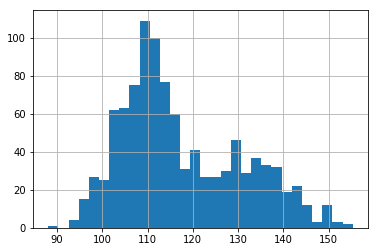

In [194]:
x_y_cor_df.iloc[:,2].hist(bins=30)

In [195]:
from sklearn.cluster import KMeans,SpectralClustering
km=KMeans(n_clusters=2)
sc=SpectralClustering(n_clusters=2)
km=km.fit(np.array(x_y_cor_df_sorted.iloc[:,2]).reshape(-1,1))
sc=sc.fit(np.array(x_y_cor_df_sorted.iloc[:,2]).reshape(-1,1))


In [196]:
#sc.cluster_centers_

In [197]:
km.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [199]:
kmeans_img=img_const.copy()
for i in range(x_y_cor_df.shape[0]):
        if sc.labels_[i]==0:
            
            jx=int(x_y_cor_df_sorted.iloc[i,1])
            ix=int(x_y_cor_df_sorted.iloc[i,0])
            cv2.rectangle(kmeans_img,(jx-draw_diam,ix-draw_diam),(jx+draw_diam,ix+draw_diam),(255,0,0))

            
cv2.namedWindow('yellow wells kmeans',cv2.WINDOW_NORMAL)
cv2.resizeWindow('yellow wells kmeans', 1000,1000)

cv2.imshow('yellow wells kmeans',kmeans_img)

cv2.waitKey(1000000)
cv2.destroyAllWindows()